In [1]:
import pandas as pd
from __future__ import division
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import  pickle

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS

from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.mixture import GaussianMixture

from pylab import plot, show, grid, axis, xlabel, ylabel, title

In [2]:
sc = pickle.load(open('/home/aleespa/Desktop/Equipo-3/MyT/SC.m','rb'))
mm = pickle.load(open('/home/aleespa/Desktop/Equipo-3/MyT/MM.m','rb'))
pca = pickle.load(open('/home/aleespa/Desktop/Equipo-3/MyT/PCA.m','rb'))
cl = pickle.load(open('/home/aleespa/Desktop/Equipo-3/MyT/.m','rb'))

In [3]:
Analy = "FCX"
X = pd.read_csv('DatosH.csv')
X.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
0,39.889591,40.034653,151.606461,101.014183,53.132004,98.035957,40.731670,97.839996,91.970001,51.542179,...,36.159698,43.403381,71.344223,58.235184,25.844584,35.019852,49.407043,100.141838,26.077538,46.464733
1,39.752350,39.652996,150.570786,98.482841,52.910660,99.469872,40.722183,98.349213,92.339996,51.163475,...,36.235405,44.047802,71.952095,59.422451,25.794401,35.010139,49.283886,102.227112,25.794411,47.192116
2,39.928806,40.347797,146.587433,96.555573,52.919880,97.949341,40.380615,98.157059,91.019997,48.985897,...,35.923115,43.242279,71.353424,58.561680,25.468208,34.573360,48.934940,102.669739,25.042643,47.201954
3,38.232834,39.584499,148.210632,92.480476,52.763092,94.821655,39.412853,95.274612,89.110001,47.736160,...,35.175507,41.536469,70.211334,58.047199,24.765638,33.680397,47.265457,100.309067,24.290873,45.766827
4,37.830906,39.506207,144.954269,92.969490,51.324356,94.273102,38.587395,94.352219,87.849998,47.319588,...,34.494141,40.683563,68.792915,56.385040,24.063066,33.360092,46.622292,99.886101,24.017504,45.098415


In [4]:
Y = pd.DataFrame()
for i in range(258):
    Y[Analy+'{}'.format(i)] = list(X.iloc[i:292+i][Analy])
Y = Y.pct_change().drop([0])
Y.head()

,FCX0,FCX1,FCX2,FCX3,FCX4,FCX5,FCX6,FCX7,FCX8,FCX9,...,FCX248,FCX249,FCX250,FCX251,FCX252,FCX253,FCX254,FCX255,FCX256,FCX257
1,0.024427,-0.080477,-0.090762,-0.035651,-0.203327,-0.046404,-0.090024,0.122995,0.035714,-0.089655,...,-0.013808,-0.006632,-0.021513,0.044731,0.076197,-0.014160,0.019152,-0.014765,0.059264,0.020579
2,-0.080477,-0.090762,-0.035651,-0.203327,-0.046404,-0.090024,0.122995,0.035714,-0.089655,0.027778,...,-0.006632,-0.021513,0.044731,0.076197,-0.014160,0.019152,-0.014765,0.059264,0.020579,-0.037807
3,-0.090762,-0.035651,-0.203327,-0.046404,-0.090024,0.122995,0.035714,-0.089655,0.027778,0.063882,...,-0.021513,0.044731,0.076197,-0.014160,0.019152,-0.014765,0.059264,0.020579,-0.037807,-0.005239
4,-0.035651,-0.203327,-0.046404,-0.090024,0.122995,0.035714,-0.089655,0.027778,0.063882,-0.090069,...,0.044731,0.076197,-0.014160,0.019152,-0.014765,0.059264,0.020579,-0.037807,-0.005239,-0.008558
5,-0.203327,-0.046404,-0.090024,0.122995,0.035714,-0.089655,0.027778,0.063882,-0.090069,0.000000,...,0.076197,-0.014160,0.019152,-0.014765,0.059264,0.020579,-0.037807,-0.005239,-0.008558,0.011952


In [5]:
Z = pd.DataFrame(columns=Y.columns)
Z = Z.T
Z['Mean'] = Y.mean()
Z['Std'] = Y.std()
Z['Skew'] = Y.skew()
Z['Kurt'] = Y.kurt()

Z= Z.fillna(Z.mean())

In [6]:
Zmm = pd.DataFrame(mm.transform(Z),columns= Z.columns)
Zs = pd.DataFrame(sc.transform(Z),columns=Z.columns)
Zp = pd.DataFrame(pca.transform(Zs),columns=['p1','p2'])

Zp['cl']=Zmm['cl'] = Z['cl']= cl.predict(Zmm)

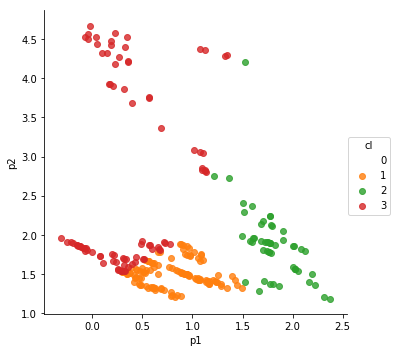

In [7]:
sns.lmplot(data=Zp,x='p1',y='p2',fit_reg=False,hue='cl',hue_order=[0,1,2,3])

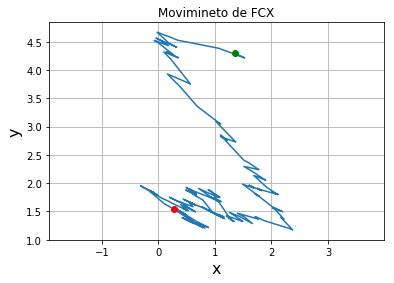

In [8]:
plot(Zp['p1'],Zp['p2'])
plot(Zp['p1'][0],Zp['p2'][0], 'go')
plot(Zp['p1'][249],Zp['p2'][249], 'ro')
title('Movimineto de '+Analy)
xlabel('x', fontsize=16)
ylabel('y', fontsize=16)
axis('equal')
grid(True)
show()